In [3]:
#1. Liste os 10 primeiros itens do dataset
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Netflix TV Shows and Movies.csv")
print(df.head(11))

    index        id                            title   type  \
0       0   tm84618                      Taxi Driver  MOVIE   
1       1  tm127384  Monty Python and the Holy Grail  MOVIE   
2       2   tm70993                    Life of Brian  MOVIE   
3       3  tm190788                     The Exorcist  MOVIE   
4       4   ts22164     Monty Python's Flying Circus   SHOW   
5       5   tm14873                      Dirty Harry  MOVIE   
6       6  tm185072                     My Fair Lady  MOVIE   
7       7   tm98978                  The Blue Lagoon  MOVIE   
8       8  tm119281                 Bonnie and Clyde  MOVIE   
9       9   tm67378                The Professionals  MOVIE   
10     10   tm44204             The Guns of Navarone  MOVIE   

                                          description  release_year  \
0   A mentally unstable Vietnam War veteran works ...          1976   
1   King Arthur, accompanied by his squire, recrui...          1975   
2   Brian Cohen is an average 

In [4]:
#2.Liste os últimos 10 itens do dataset. 
df = pd.read_csv("Netflix TV Shows and Movies.csv")
print(df.tail(10))

      index         id                               title   type  \
5273   5273  tm1097142                            My Bride  MOVIE   
5274   5274   tm878575                 The Heartbreak Club  MOVIE   
5275   5275   ts286386                         The Big Day   SHOW   
5276   5276   tm985215                Princess 'Daya'Reese  MOVIE   
5277   5277  tm1004011                       Time to Dance  MOVIE   
5278   5278  tm1040816         Momshies! Your Soul is Mine  MOVIE   
5279   5279  tm1014599                           Fine Wine  MOVIE   
5280   5280  tm1045018                               Clash  MOVIE   
5281   5281  tm1098060                      Shadow Parties  MOVIE   
5282   5282   ts271048  Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
5273  The story follows a young man and woman who go...          2021   
5274  Coping with heartbreak, the shy owner of floun...          2021   
5275  For six engaged

In [5]:
#3.Qual o filme com o maior imdb_score e qual o filme com o pior imdb_score? 

filmes = df[df['type'] == 'MOVIE']

melhor_filme = filmes.loc[filmes['imdb_score'].idxmax()]

pior_filme = filmes.loc[filmes['imdb_score'].idxmin()]

print("Filme com o maior imdb_score:")
print(f"Título: {melhor_filme['title']}")

print("\nFilme com o menor imdb_score:")
print(f"Título: {pior_filme['title']}")


Filme com o maior imdb_score:
Título: No Longer Kids

Filme com o menor imdb_score:
Título: Aerials


In [6]:
#4.Qual a média de duração dos shows de TV e duração de filmes?

shows = df[df['type'] == 'SHOW']
filmes = df[df['type'] == 'MOVIE']

media_duracao_shows = shows['runtime'].mean()

media_duracao_filmes = filmes['runtime'].mean()

print(f"Média de duração dos shows de TV: {media_duracao_shows:.2f} minutos")
print(f"Média de duração dos filmes: {media_duracao_filmes:.2f} minutos")

Média de duração dos shows de TV: 38.63 minutos
Média de duração dos filmes: 101.54 minutos


In [7]:
#5.Qual o show de TV com maior duração por episódio e o filme com duração mais longa?

shows = df[df['type'] == 'SHOW']
filmes = df[df['type'] == 'MOVIE']

show_mais_longo = shows.loc[shows['runtime'].idxmax()]

filme_mais_longo = filmes.loc[filmes['runtime'].idxmax()]

print("Show de TV com maior duração por episódio:")
print(f"Título: {show_mais_longo['title']}")

print("\nFilme com maior duração:")
print(f"Título: {filme_mais_longo['title']}")

Show de TV com maior duração por episódio:
Título: 1994

Filme com maior duração:
Título: No Longer Kids


In [8]:
#6.Qual ano apresentou a maior quantidade de filmes avaliados com imdb?

filmes_com_imdb = df[(df['type'] == 'MOVIE') & (df['imdb_score'].notna())]

contagem_por_ano = filmes_com_imdb['release_year'].value_counts().sort_index()

ano_mais_filmes = contagem_por_ano.idxmax()
quantidade_filmes = contagem_por_ano.max()

print(f"O ano com mais filmes avaliados no IMDb foi {ano_mais_filmes}")

O ano com mais filmes avaliados no IMDb foi 2019


In [9]:
#7.Quais as categorias encontradas de age_certification e qual a quantidade de filmes para cada categoria?

filmes = df[df['type'] == 'MOVIE']

contagem_categorias = filmes['age_certification'].value_counts().sort_values(ascending=False)

print("Categorias de age_certification e quantidade de filmes:")
print(contagem_categorias)





Categorias de age_certification e quantidade de filmes:
age_certification
R        548
PG-13    424
PG       238
G        105
NC-17     13
Name: count, dtype: int64


In [10]:
#8.Quais colunas apresentam campos vazios? Qual a quantidade de campos vazios?

valores_nulos = df.isnull().sum()

valores_vazios = (df == '').sum()

total_vazios = valores_nulos + valores_vazios

total_vazios_ordenado = total_vazios.sort_values(ascending=False)

print("Colunas com campos vazios:")
for coluna, total in total_vazios_ordenado.items():
    if total > 0:
        print(f"{coluna}: {total}")

Colunas com campos vazios:
age_certification: 2285
imdb_votes: 16
description: 5


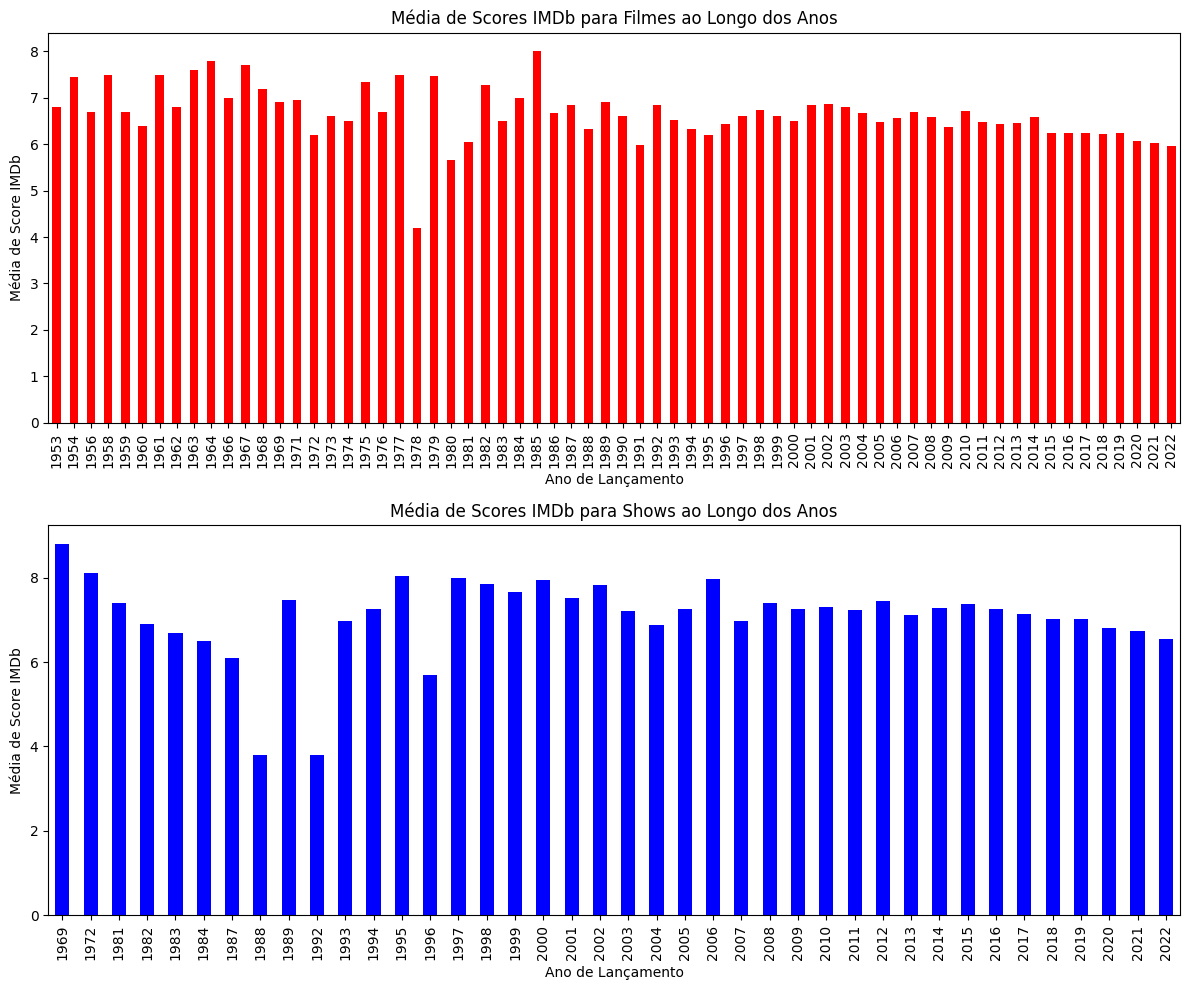

In [11]:
#9.Gere um gráfico que você considere interessantes para apresentar a média de scores ao longo dos anos para filme e outro para shows.

filmes = df[df['type'] == 'MOVIE']
shows = df[df['type'] == 'SHOW']

media_filmes = filmes.groupby('release_year')['imdb_score'].mean()
media_shows = shows.groupby('release_year')['imdb_score'].mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

media_filmes.plot(kind='bar', ax=ax1, color='red')
ax1.set_title('Média de Scores IMDb para Filmes ao Longo dos Anos')
ax1.set_xlabel('Ano de Lançamento')
ax1.set_ylabel('Média de Score IMDb')

media_shows.plot(kind='bar', ax=ax2, color='blue')
ax2.set_title('Média de Scores IMDb para Shows ao Longo dos Anos')
ax2.set_xlabel('Ano de Lançamento')
ax2.set_ylabel('Média de Score IMDb')

plt.tight_layout()
plt.show()

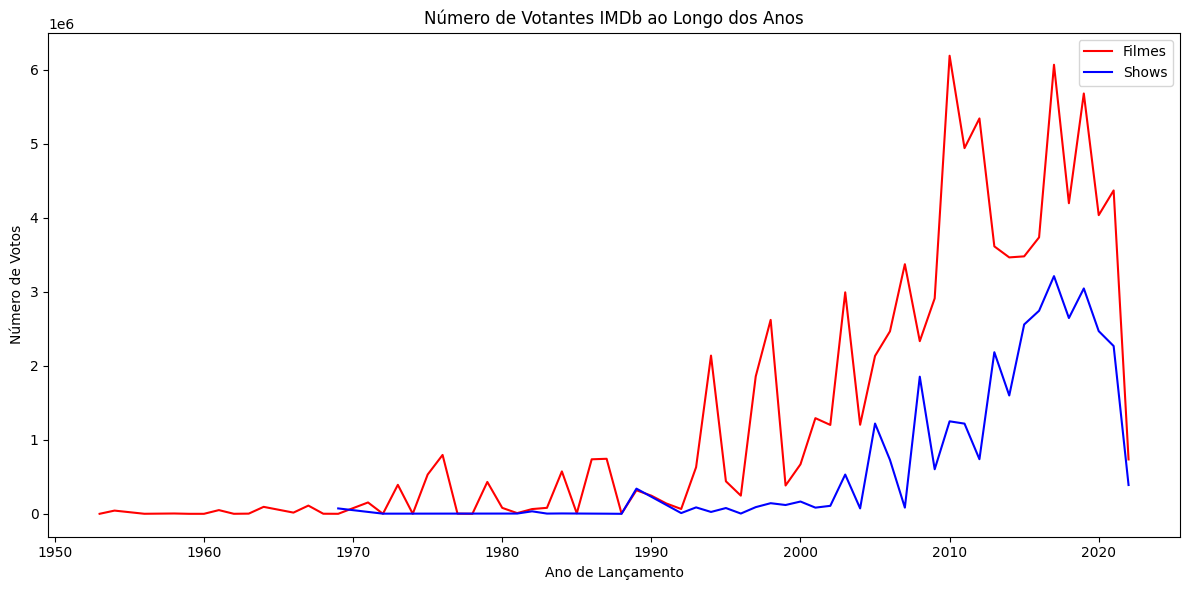

In [13]:
#10.Gere um gráfico que você considere interessante para apontar a proporção de votantes para shows e filmes.

filmes = df[df['type'] == 'MOVIE']
shows = df[df['type'] == 'SHOW']

votos_filmes = filmes.groupby('release_year')['imdb_votes'].sum()
votos_shows = shows.groupby('release_year')['imdb_votes'].sum()

plt.figure(figsize=(12, 6))

plt.plot(votos_filmes.index, votos_filmes.values, label='Filmes', color='red')
plt.plot(votos_shows.index, votos_shows.values, label='Shows', color='blue')

plt.title('Número de Votantes IMDb ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Votos')

plt.legend()

plt.tight_layout()
plt.show()